In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, header=None, names=column_names, na_values="?")
data.dropna(inplace=True) # Removendo valores ausentes

In [ ]:
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)
X = data.drop(columns='target')
y_classification = (data['target'] > 0).astype(int) # Classificação binária: presença de doença cardíaca
y_regression = data['chol'] # Usando colesterol como alvo para regressão
# treino e testes:
X_train, X_test, y_train, y_test = train_test_split(X,
y_classification, test_size=0.3, random_state=42)

In [ ]:
tree = DecisionTreeClassifier(random_state=42) # Cria um modelo do tipo DecisionTreeClassifier
tree.fit(X_train, y_train) # Treina o modelo (tree) com os dados detreino
y_pred_tree = tree.predict(X_test) # Usa o modelo treinado (tree) para prever as classes dos dados de teste


In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
def print_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    for cls in ['0', '1']:  # Mostrar apenas as classes 0 e 1
        print(f"Classe {cls}:")
        print(f" Precision: {report[cls]['precision']:.2f}")
        print(f" Recall: {report[cls]['recall']:.2f}")
        print(f" F1-Score: {report[cls]['f1-score']:.2f}")
        print()  # Linha em branco para separar as classes

# Classificação para o modelo com Árvore de Decisão
print("Árvore de Decisão - Classificação")
print_classification_report(y_test, y_pred_tree)
print(f"Matriz de Confusão (Leave-One-Out):\n {confusion_matrix(y_test, y_pred_tree)}")

# Classificação para o modelo com Random Forest
print("Random Forest - Classificação")
print_classification_report(y_test, y_pred_rf)
print(f"Matriz de Confusão (Leave-One-Out):\n {confusion_matrix(y_test, y_pred_rf)}")

Árvore de Decisão - Classificação
Classe 0:
 Precision: 0.74
 Recall: 0.65
 F1-Score: 0.70

Classe 1:
 Precision: 0.64
 Recall: 0.73
 F1-Score: 0.68

Matriz de Confusão (Leave-One-Out):
 [[32 17]
 [11 30]]
Random Forest - Classificação
Classe 0:
 Precision: 0.84
 Recall: 0.86
 F1-Score: 0.85

Classe 1:
 Precision: 0.82
 Recall: 0.80
 F1-Score: 0.81

Matriz de Confusão (Leave-One-Out):
 [[42  7]
 [ 8 33]]


In [ ]:
# Random Forest com 50 estimadores
rf_50 = RandomForestClassifier(random_state=42, n_estimators=50)
rf_50.fit(X_train, y_train)
y_pred_rf_50 = rf_50.predict(X_test)

# Random Forest com 200 estimadores
rf_200 = RandomForestClassifier(random_state=42, n_estimators=200)
rf_200.fit(X_train, y_train)
y_pred_rf_200 = rf_200.predict(X_test)

# Análise dos resultados
from sklearn.metrics import confusion_matrix, classification_report

def analyze_rf(y_test, y_pred, title):
    print(f"{title}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

analyze_rf(y_test, y_pred_rf_50, "Random Forest com 50 Estimadores")
analyze_rf(y_test, y_pred_rf, "Random Forest com 100 Estimadores (Padrão)")
analyze_rf(y_test, y_pred_rf_200, "Random Forest com 200 Estimadores")


Random Forest com 50 Estimadores
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.85      0.83      0.84        41

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90

Matriz de Confusão:
[[43  6]
 [ 7 34]]


Random Forest com 100 Estimadores (Padrão)
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        49
           1       0.82      0.80      0.81        41

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

Matriz de Confusão:
[[42  7]
 [ 8 33]]


Random Forest com 200 Estimadores
Relatório de Classificação:
              precision    recall  f1-score   support

           0   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
# Carregando o California Housing Dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

In [ ]:
print("Valores ausentes por coluna:")
print(X.isnull().sum()) # Resultado esperado: 0 para todas as colunas

Valores ausentes por coluna:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [ ]:
# treino e testes:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)
# Regressão com Árvore de Decisão
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
# Regressão com Gradient Boosting
gb_reg = GradientBoostingRegressor(n_estimators=100,
learning_rate=0.1, max_depth=5, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Divisão dos dados (exemplo com X e y definidos previamente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para treinar e avaliar o Gradient Boosting
def evaluate_gradient_boosting(n_estimators=100, learning_rate=0.1, max_depth=5):
    gb_reg = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )
    gb_reg.fit(X_train, y_train)
    y_pred_gb = gb_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_gb)
    r2 = r2_score(y_test, y_pred_gb)

    return mse, r2

# Parâmetros para variação
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
learning_rate_values = [0.05, 0.1, 0.15, 0.2]
max_depth_values = [1, 2, 3, 4, 5, 6, 7]

# Armazenar resultados
results = []

# Testar diferentes valores para n_estimators
for n in n_estimators_values:
    mse, r2 = evaluate_gradient_boosting(n_estimators=n)
    results.append({'Parameter': 'n_estimators', 'Value': n, 'MSE': mse, 'R²': r2})

# Testar diferentes valores para learning_rate
for lr in learning_rate_values:
    mse, r2 = evaluate_gradient_boosting(learning_rate=lr)
    results.append({'Parameter': 'learning_rate', 'Value': lr, 'MSE': mse, 'R²': r2})

# Testar diferentes valores para max_depth
for depth in max_depth_values:
    mse, r2 = evaluate_gradient_boosting(max_depth=depth)
    results.append({'Parameter': 'max_depth', 'Value': depth, 'MSE': mse, 'R²': r2})

# Criar DataFrame para visualização
results_df = pd.DataFrame(results)

# Gerar gráficos individuais
parameters = ['n_estimators', 'learning_rate', 'max_depth']

for param in parameters:
    subset = results_df[results_df['Parameter'] == param]

    # Gráfico de MSE
    plt.figure(figsize=(6, 4))
    plt.plot(subset['Value'], subset['MSE'], marker='o', label=f'{param}')
    plt.title(f'MSE vs. {param}')
    plt.xlabel(param)
    plt.ylabel('Erro Quadrático Médio (MSE)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'MSE_vs_{param}.png')
    plt.close()

    # Gráfico de R²
    plt.figure(figsize=(6, 4))
    plt.plot(subset['Value'], subset['R²'], marker='o', label=f'{param}', color='orange')
    plt.title(f'R² vs. {param}')
    plt.xlabel(param)
    plt.ylabel('R²')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'R2_vs_{param}.png')
    plt.close()


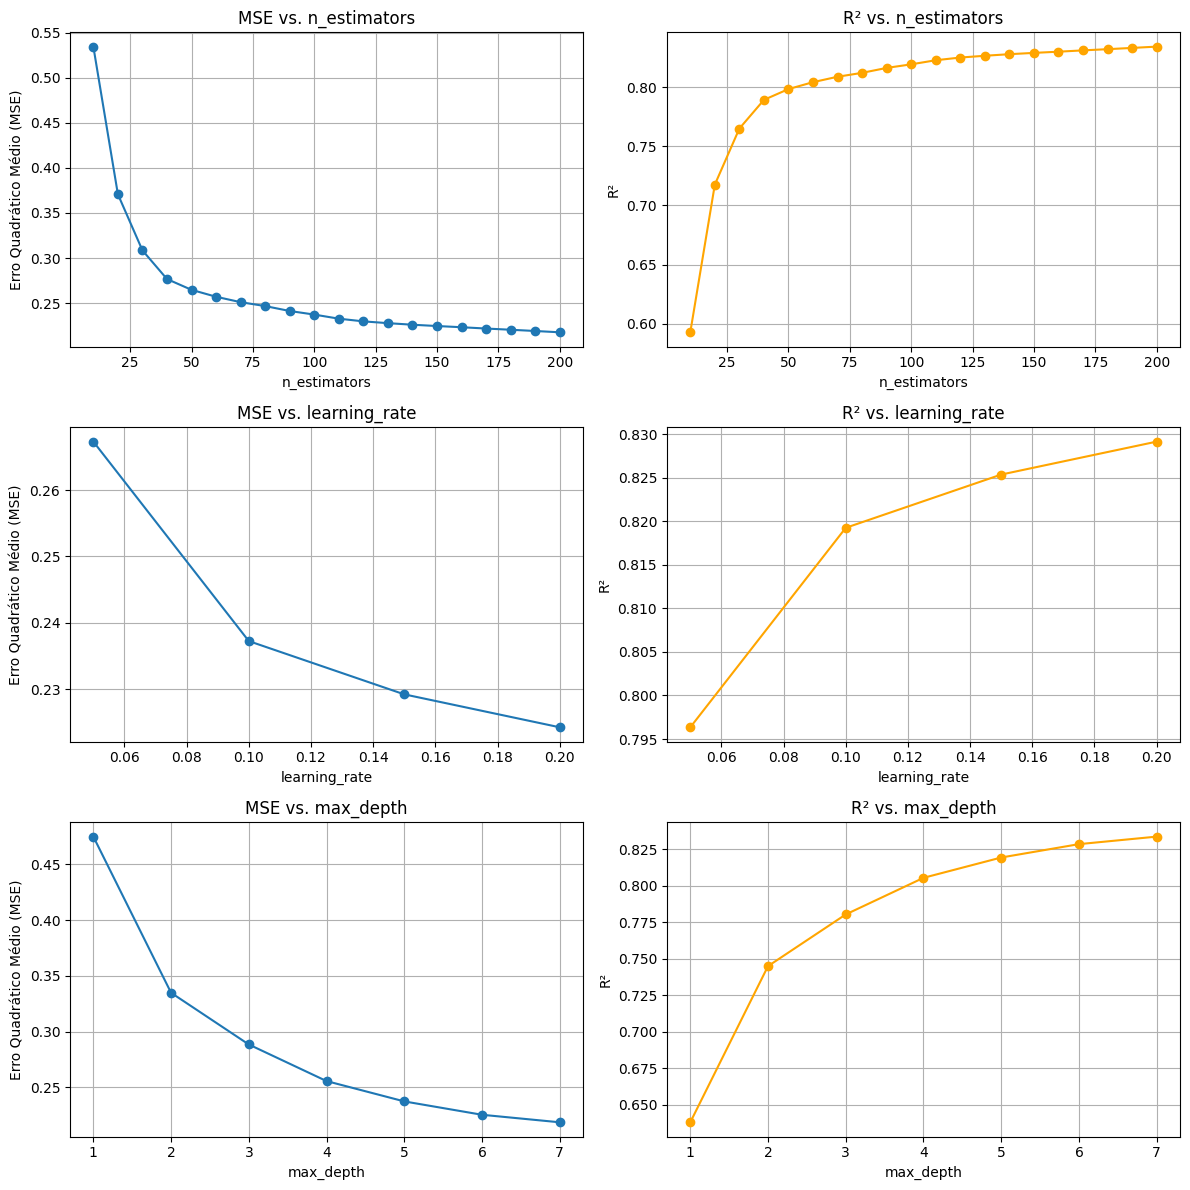

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Divisão dos dados (exemplo com X e y definidos previamente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para treinar e avaliar o Gradient Boosting
def evaluate_gradient_boosting(n_estimators=100, learning_rate=0.1, max_depth=5):
    gb_reg = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )
    gb_reg.fit(X_train, y_train)
    y_pred_gb = gb_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_gb)
    r2 = r2_score(y_test, y_pred_gb)

    return mse, r2

# Parâmetros para variação
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
learning_rate_values = [0.05, 0.1, 0.15, 0.2]
max_depth_values = [1, 2, 3, 4, 5, 6, 7]

# Armazenar resultados
results = []

# Testar diferentes valores para n_estimators
for n in n_estimators_values:
    mse, r2 = evaluate_gradient_boosting(n_estimators=n)
    results.append({'Parameter': 'n_estimators', 'Value': n, 'MSE': mse, 'R²': r2})

# Testar diferentes valores para learning_rate
for lr in learning_rate_values:
    mse, r2 = evaluate_gradient_boosting(learning_rate=lr)
    results.append({'Parameter': 'learning_rate', 'Value': lr, 'MSE': mse, 'R²': r2})

# Testar diferentes valores para max_depth
for depth in max_depth_values:
    mse, r2 = evaluate_gradient_boosting(max_depth=depth)
    results.append({'Parameter': 'max_depth', 'Value': depth, 'MSE': mse, 'R²': r2})

# Criar DataFrame para visualização
results_df = pd.DataFrame(results)

# Gráficos individuais
parameters = ['n_estimators', 'learning_rate', 'max_depth']
fig, axes = plt.subplots(len(parameters), 2, figsize=(12, 12))

for i, param in enumerate(parameters):
    subset = results_df[results_df['Parameter'] == param]
    # Gráfico de MSE
    axes[i, 0].plot(subset['Value'], subset['MSE'], marker='o', label=f'{param}')
    axes[i, 0].set_title(f'MSE vs. {param}')
    axes[i, 0].set_xlabel(param)
    axes[i, 0].set_ylabel('Erro Quadrático Médio (MSE)')
    axes[i, 0].grid(True)

    # Gráfico de R²
    axes[i, 1].plot(subset['Value'], subset['R²'], marker='o', label=f'{param}', color='orange')
    axes[i, 1].set_title(f'R² vs. {param}')
    axes[i, 1].set_xlabel(param)
    axes[i, 1].set_ylabel('R²')
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


Erro Quadrático Médio (Árvore de Decisão): 0.53
Erro Quadrático Médio (Gradient Boosting): 0.24
R² (Árvore de Decisão): 0.60
R² (Gradient Boosting): 0.82


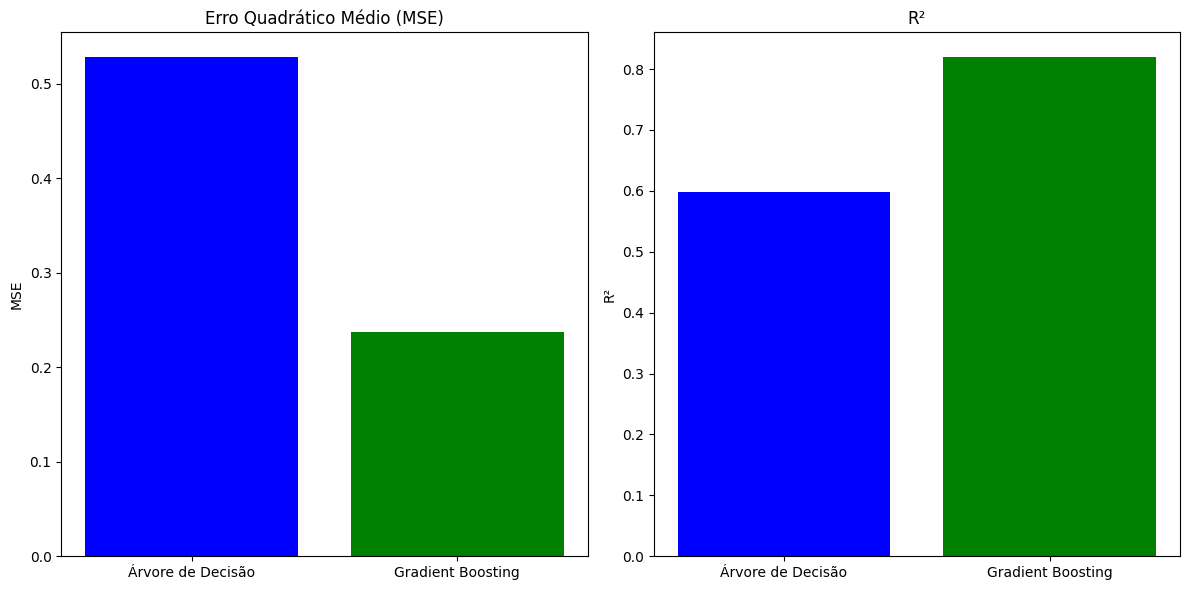

In [ ]:
# MSE
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Erro Quadrático Médio (Árvore de Decisão): {mse_tree:.2f}")
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Erro Quadrático Médio (Gradient Boosting): {mse_gb:.2f}")
# R2
r2_tree = r2_score(y_test, y_pred_tree)
print(f"R² (Árvore de Decisão): {r2_tree:.2f}")
r2_gb = r2_score(y_test, y_pred_gb)
print(f"R² (Gradient Boosting): {r2_gb:.2f}")
# Gráficos
labels = ['Árvore de Decisão', 'Gradient Boosting']
mse_values = [mse_tree, mse_gb]
r2_values = [r2_tree, r2_gb]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Gráfico de MSE
ax[0].bar(labels, mse_values, color=['blue', 'green'])
ax[0].set_title('Erro Quadrático Médio (MSE)')
ax[0].set_ylabel('MSE')
# Gráfico de R²
ax[1].bar(labels, r2_values, color=['blue', 'green'])
ax[1].set_title('R²')
ax[1].set_ylabel('R²')
# Exibindo
plt.tight_layout()
plt.show()
